<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_5/Experiment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Roll Number = 191EE123 <br> a = 1 + mod(123,3) = 1

In [1]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
from scipy.signal import chirp, spectrogram
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks



a = 1
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})

# **Problem** **1**. <br>
2+2$\alpha$Hz = 4Hz <br>
5+5$\alpha$Hz = 10Hz <br>

Part 1:


In [2]:
Fs = 100
f0 = 4
f1 = 10
tf = 10
n=np.arange(0, tf, (1/Fs))
def chirp_signal(t):
  ft = f0 + (f1 - f0) * t / tf
  return np.sin(2*pi*ft*t)

w = chirp_signal(n)

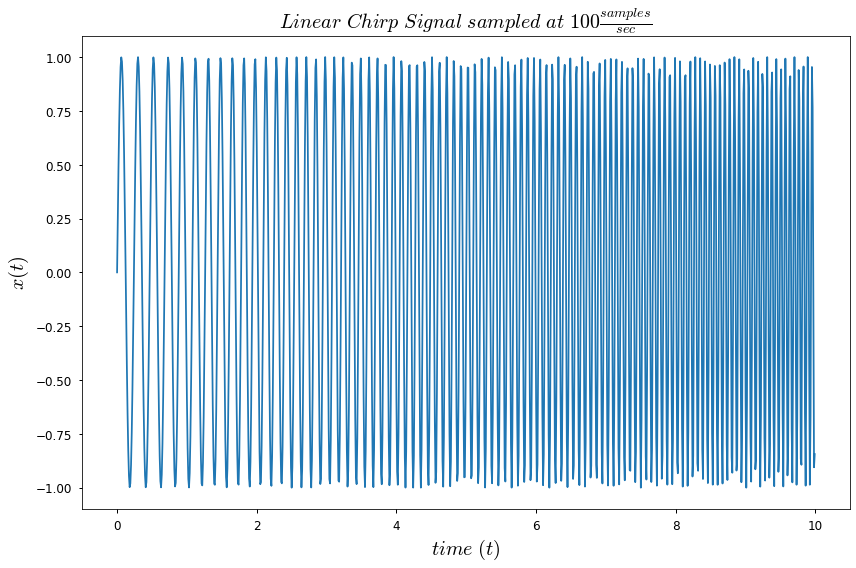

In [3]:
fig, axs = plt.subplots(figsize=(12,8))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None):  
    axs.plot(x, y)
    axs.set_title(r'$Linear\ Chirp\ Signal\ sampled\ at\ 100\frac{samples}{sec}$', fontsize = 20)
    axs.set_xlabel(xaxis_label, fontsize = 20)
    axs.set_ylabel(yaxis_label, fontsize = 20)
    axs.tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(n, w , xaxis_label=r'$time\ (t)$', yaxis_label=r'$x(t)$')
fig.savefig('fig1.png')

Part 2:

In [4]:
def mag_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    Xn = X/len(x)
    return N, X, Xn
    
frequency_1, ms_1, msn_1 = mag_spec(w, Fs, Fs/2)

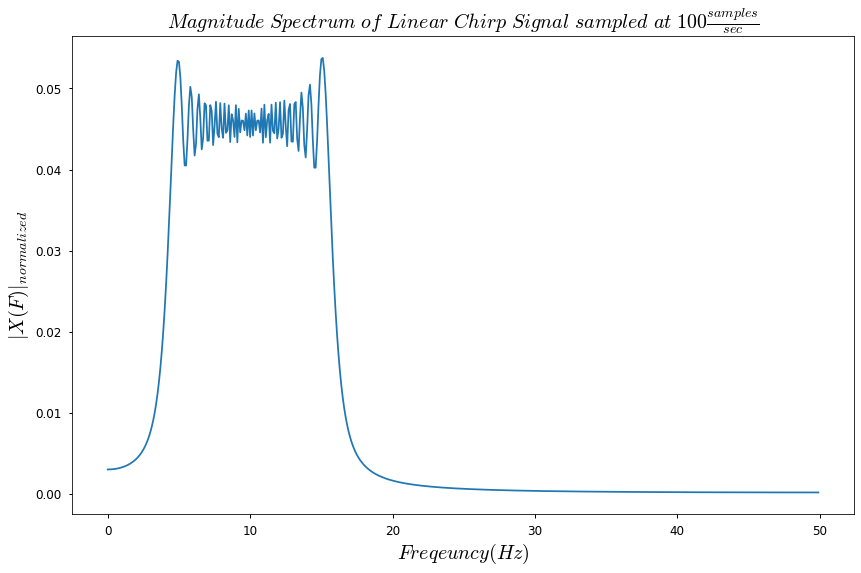

In [60]:
fig, axs = plt.subplots(figsize=(12,8))
def plot(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs.plot(x, y)
    axs.set_title(r'$Magnitude\ Spectrum\ of\ Linear\ Chirp\ Signal\ sampled\ at\ 100\frac{samples}{sec}$', fontsize = 20)
    axs.set_xlabel(xaxis_label, fontsize = 20)
    axs.set_ylabel(yaxis_label, fontsize = 20)
    axs.tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot(frequency_1, msn_1, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|_{normalized}$', row=0)
fig.savefig('fig2.png')

Part 3:

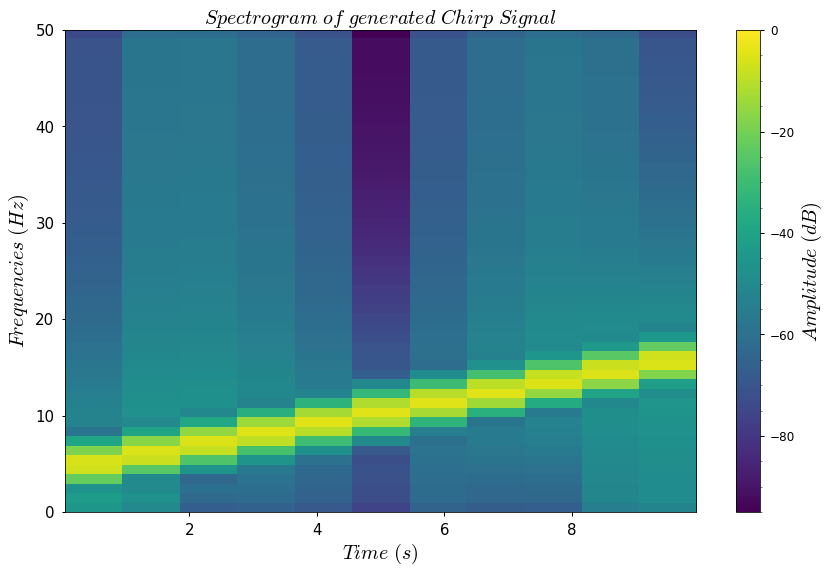

In [61]:
fs = 100
Nos = 100
def specgram2d(y, Nos, fs, window=None, ax=None, title=None):
  ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True, fontsize = 20)
  if window=='hamming':
    ws=sp.windows.hamming(Nos)
  elif window=='hanning':
    ws=sp.windows.hanning(Nos)
  elif window=='blackman':
    ws=sp.windows.blackman(Nos)
  else:
    ws=sp.windows.boxcar(Nos)
  spec, freqs, t, im = ax.specgram(y, NFFT=Nos, Fs=fs, window=ws, noverlap=10, scale='dB', vmax=0)
  ax.set_xlabel(r'$Time\ (s)$', fontsize = 20)
  ax.set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 20)
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 20)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  fig1.tight_layout()


fig1, ax1 = plt.subplots(figsize=(12,8))
specgram2d(w, Nos, fs, ax=ax1, window='hamming', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal$')
fig1.savefig('fig3.png')

Spectrograms of Generated Chirp Signal for varying window lengths

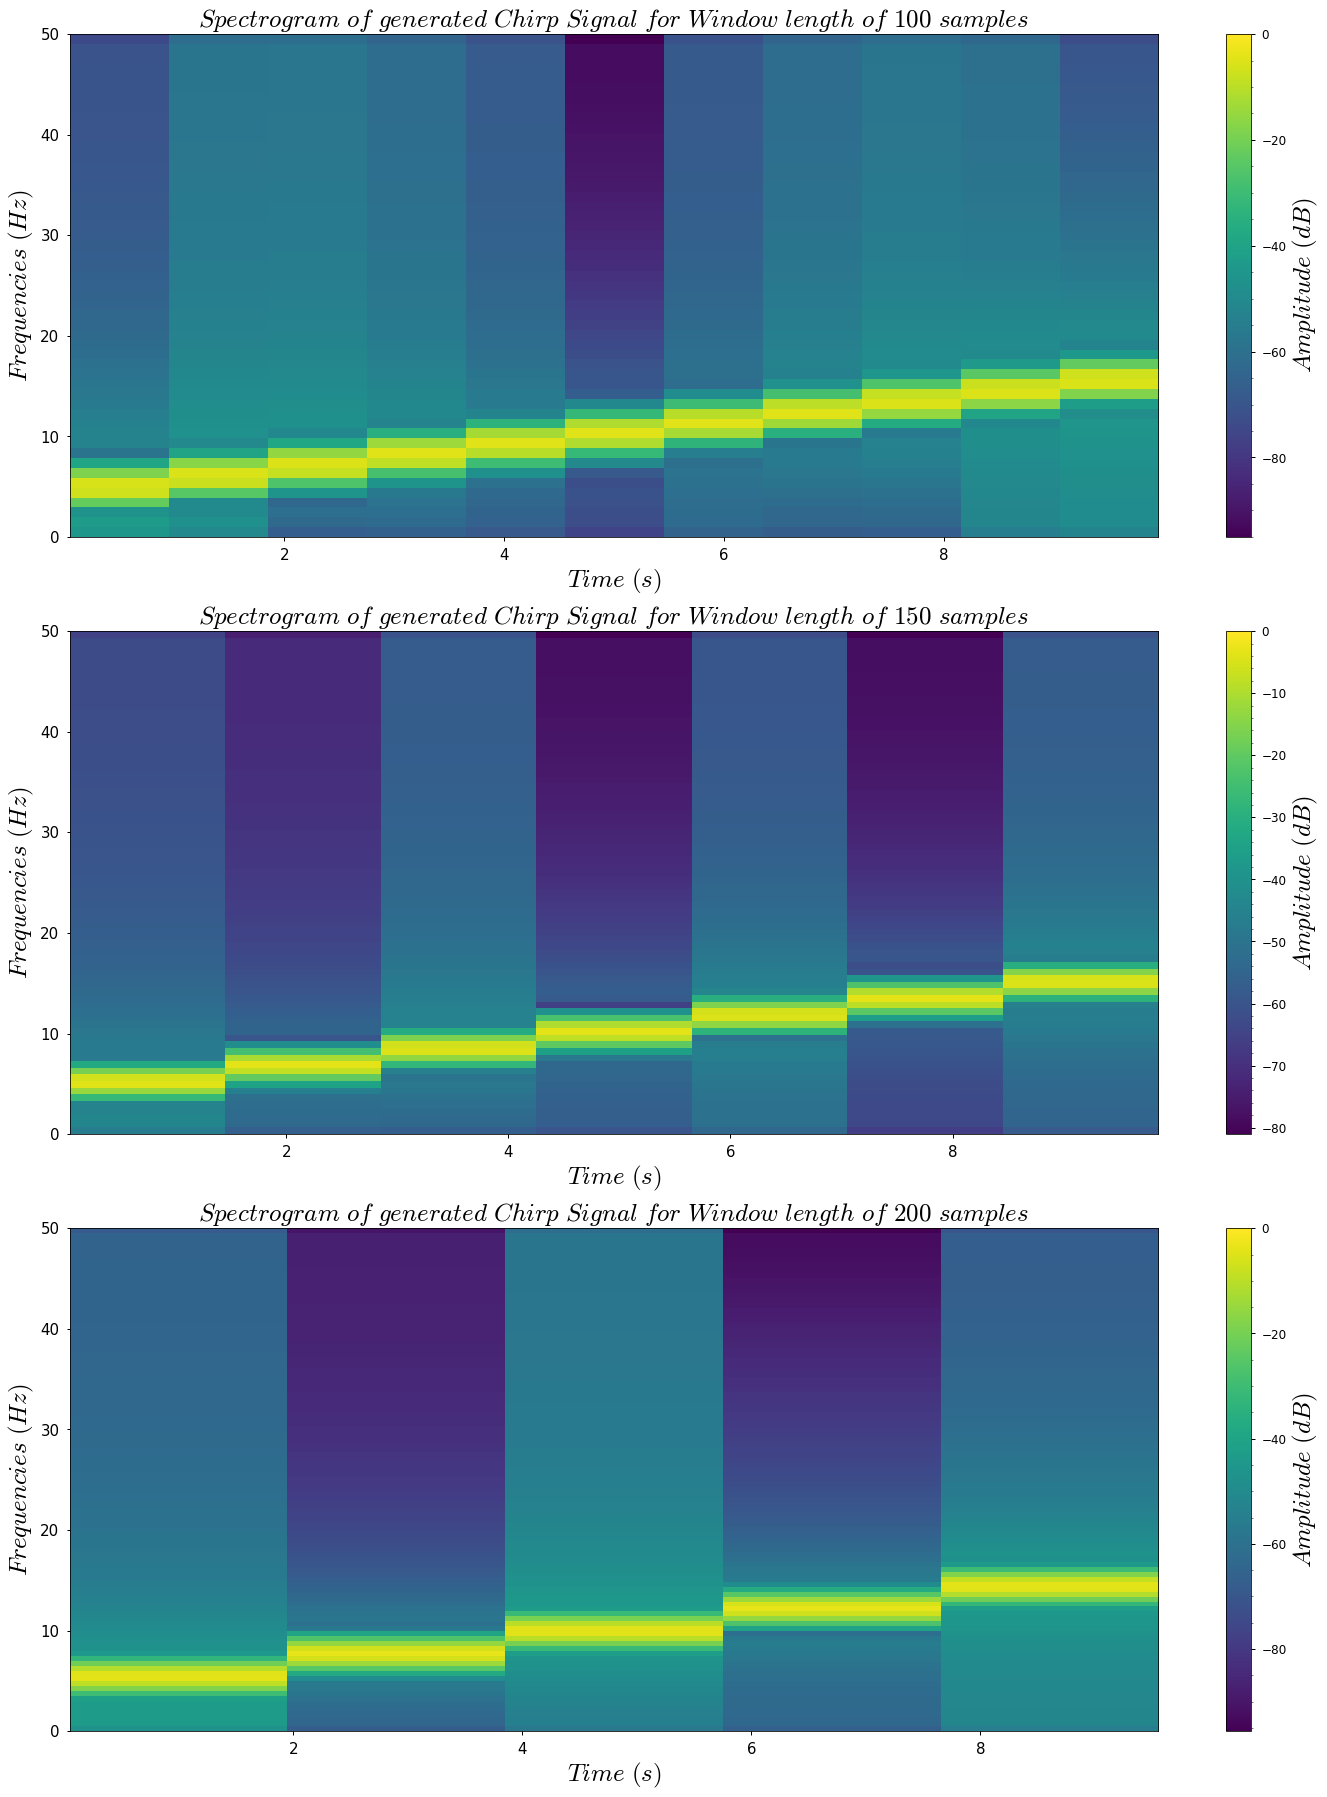

In [62]:
Nos1 = 100
Nos2 = 150
Nos3 = 200

fig2, axs = plt.subplots(3, figsize=(20,25))
def specgram2d(y, Nos, fs, window=None, row=None, title=None):
  #axs[row].plot.axes()
  axs[row].set_title(title, loc='center', wrap=True, fontsize = 25)
  if window=='hamming':
    ws=sp.windows.hamming(Nos)
  elif window=='hanning':
    ws=sp.windows.hanning(Nos)
  elif window=='blackman':
    ws=sp.windows.blackman(Nos)
  else:
    ws=sp.windows.boxcar(Nos)
  spec, freqs, t, im = axs[row].specgram(y, NFFT=Nos, Fs=fs, window=ws, noverlap=10, scale='dB', vmax=0)
  axs[row].set_xlabel(r'$Time\ (s)$', fontsize = 25)
  axs[row].set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 25)
  cbar = plt.colorbar(im, ax=axs[row])
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 25)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  axs[row].tick_params(axis="both", labelsize = 15)
  fig2.tight_layout()



specgram2d(w, Nos1, fs, row=0, window='hamming', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ for\ Window\ length\ of\ 100\ samples$')
specgram2d(w, Nos2, fs, row=1, window='hamming', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ for\ Window\ length\ of\ 150\ samples$')
specgram2d(w, Nos3, fs, row=2, window='hamming', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ for\ Window\ length\ of\ 200\ samples$')
fig2.savefig('fig4.png')

Spectrograms of Generated Chirp Signal for different windowing techniques

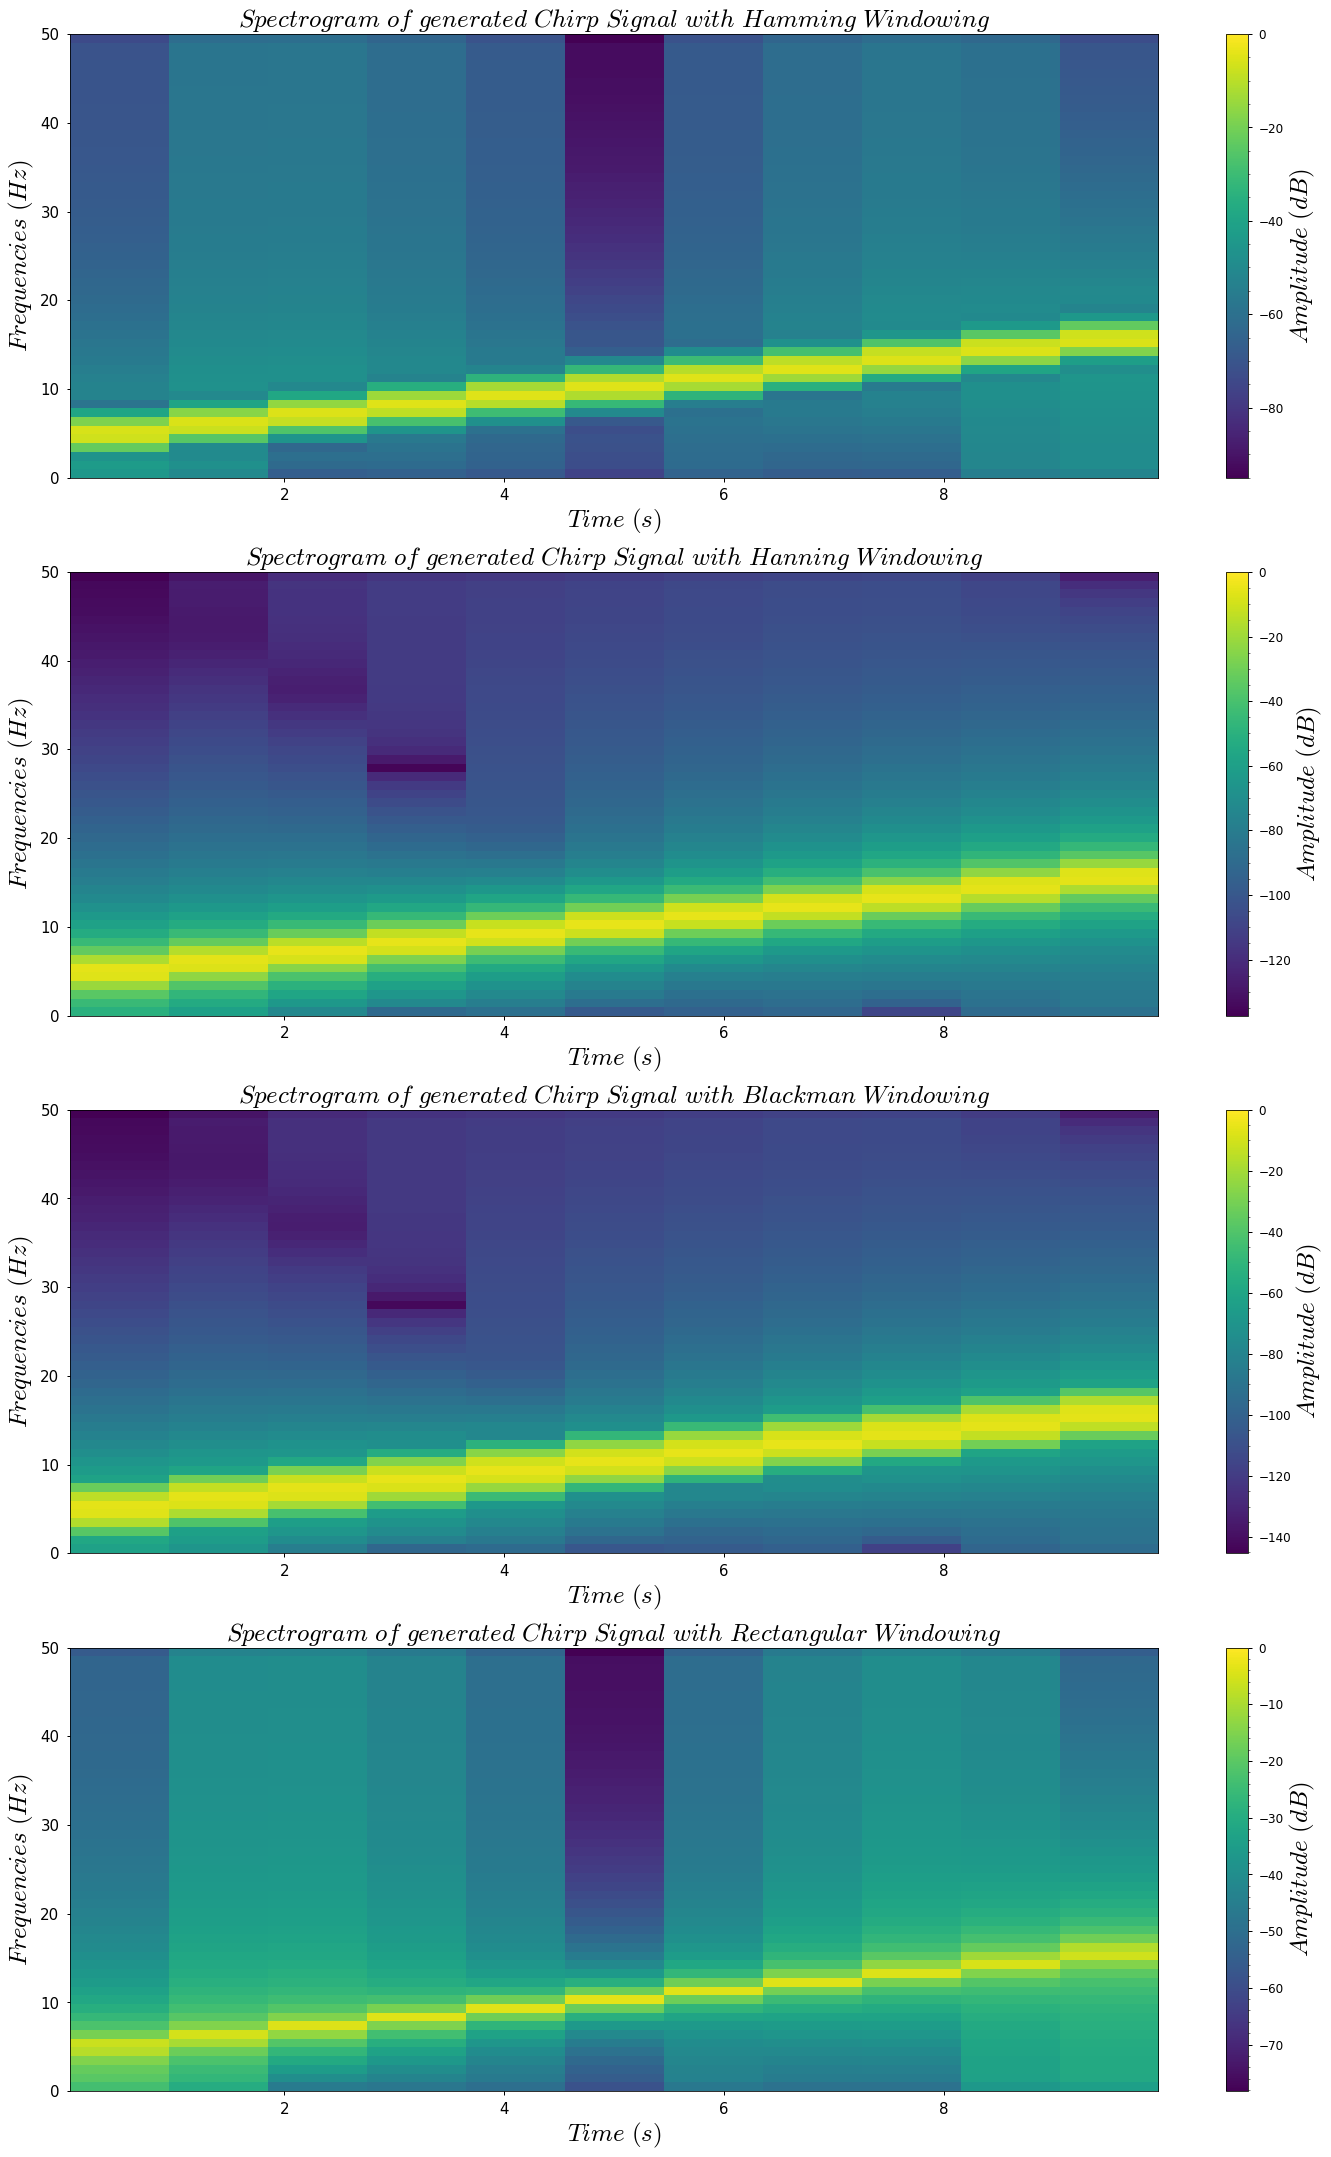

In [63]:
fig3, axs = plt.subplots(4, figsize=(20,30))
def specgram2d(y, Nos, fs, window=None, row=None, title=None):
  #axs[row].plot.axes()
  axs[row].set_title(title, loc='center', wrap=True, fontsize = 25)
  if window=='hamming':
    ws=sp.windows.hamming(Nos)
  elif window=='hanning':
    ws=sp.windows.hann(Nos)
  elif window=='blackman':
    ws=sp.windows.blackman(Nos)
  else:
    ws=sp.windows.boxcar(Nos)
  spec, freqs, t, im = axs[row].specgram(y, NFFT=Nos, Fs=fs, window=ws, noverlap=10, scale='dB', vmax=0)
  axs[row].set_xlabel(r'$Time\ (s)$', fontsize = 25)
  axs[row].set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 25)
  cbar = plt.colorbar(im, ax=axs[row])
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 25)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  axs[row].tick_params(axis="both", labelsize = 15)
  fig3.tight_layout()

specgram2d(w, Nos, fs, row=0, window='hamming', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ with\ Hamming\ Windowing$')
specgram2d(w, Nos, fs, row=1, window='hanning', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ with\ Hanning\ Windowing$')
specgram2d(w, Nos, fs, row=2, window='blackman', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ with\ Blackman\ Windowing$')
specgram2d(w, Nos, fs, row=3, window=None, title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ with\ Rectangular\ Windowing$')
fig3.savefig('fig5.png')

# **Problem** **2**. <br>
Part 1:

Sampling rate of instrument : 11025Hz
Size of instrument signal: (36250,)


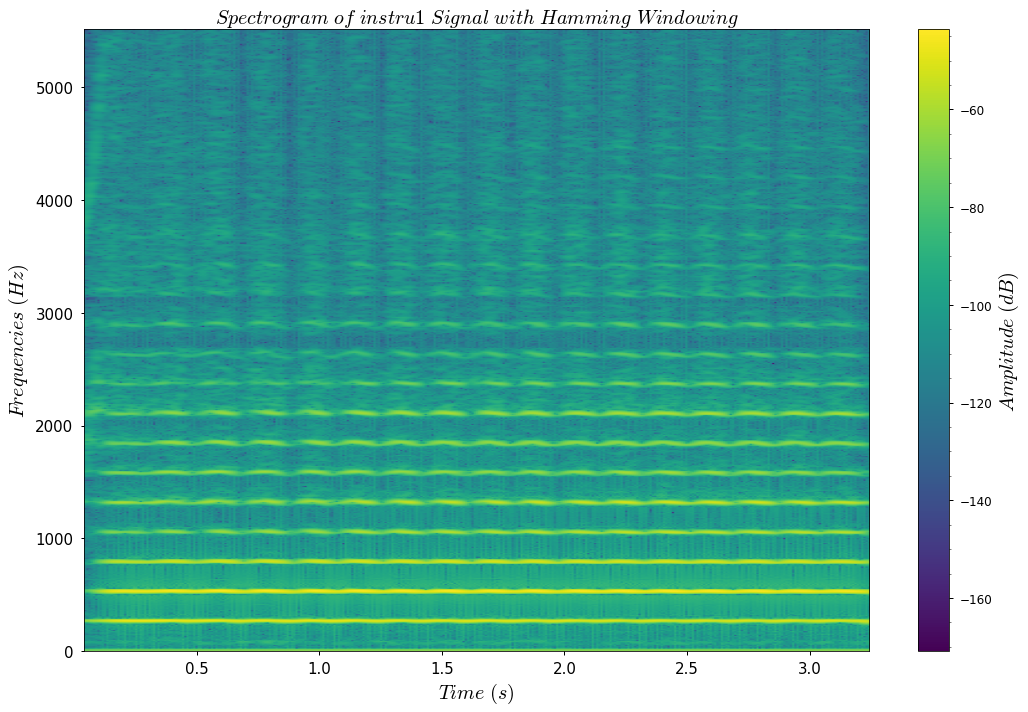

In [35]:
Fs1, track= wavfile.read('instru1.wav')
track = track/32767.0
print('Sampling rate of instrument : {}Hz'.format(Fs1))
print('Size of instrument signal: {}'.format(track.shape))
Nosi = 1000
def specgram2d(y, N, Fs, window=None, ax=None, title=None):
  ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True, fontsize = 20)
  if window=='hamming':
    ws=sp.windows.hamming(N)
  elif window=='hanning':
    ws=sp.windows.hanning(N)
  elif window=='blackman':
    ws=sp.windows.blackman(N)
  else:
    ws=sp.windows.boxcar(N)
  spec, freqs, t, im = ax.specgram(y, NFFT=N, Fs=Fs, window=ws, noverlap=900, scale='dB')
  ax.set_xlabel(r'$Time\ (s)$', fontsize = 20)
  ax.set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 20)
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 20)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  fig4.tight_layout()


fig4, ax1 = plt.subplots(figsize=(15,10))
specgram2d(track, Nosi, Fs1, ax=ax1, window='hamming', title = r'$Spectrogram\ of\ instru1\ Signal\ with\ Hamming\ Windowing$')
fig4.savefig('fig6.png')


display(Audio(data=track, rate=Fs1))

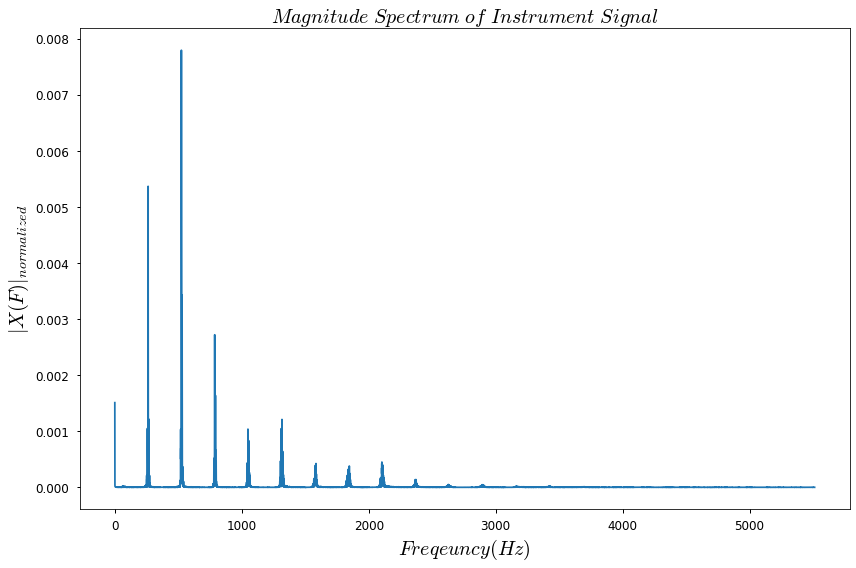

In [40]:
frequency_2, ms_2, msn_2= mag_spec(track, Fs1, Fs1/2)
fig, axs = plt.subplots(figsize=(12,8))
def plot(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs.plot(x, y)
    axs.set_title(r'$Magnitude\ Spectrum\ of\ Instrument\ Signal$', fontsize = 20)
    axs.set_xlabel(xaxis_label, fontsize = 20)
    axs.set_ylabel(yaxis_label, fontsize = 20)
    axs.tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot(frequency_2, msn_2, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|_{normalized}$', row=0)
fig.savefig('fig7.png')

Fundamental Pitch of the instrument using conventional way

In [9]:
def find_ff(track, frequency):
  TRACK = fft(track)
  max_val = np.max(np.abs(TRACK))
  TRACK = TRACK/max_val
  for i in range (len(TRACK)):
    if (np.abs(TRACK[i])<=0.1):
      TRACK[i]=0;
    elif (i==0):
      TRACK[i]=0 

  TRACK_peaks = sp.find_peaks(np.abs(TRACK), prominence=0.6)[0] 
  fundamental_frequency = (TRACK_peaks[0]/len(TRACK)) *frequency
  return fundamental_frequency

ff_1 = find_ff(track, Fs1)

print('The Fundamental frequency of the instru1 audio signal: {} Hz'.format(ff_1))

The Fundamental frequency of the instru1 audio signal: 262.4710344827586 Hz


Finding the fundamental pitch of the instrument from the spectrogram

Part 2:

Sampling rate of instrument : 44100Hz
Size of instrument signal: (220500,)


/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


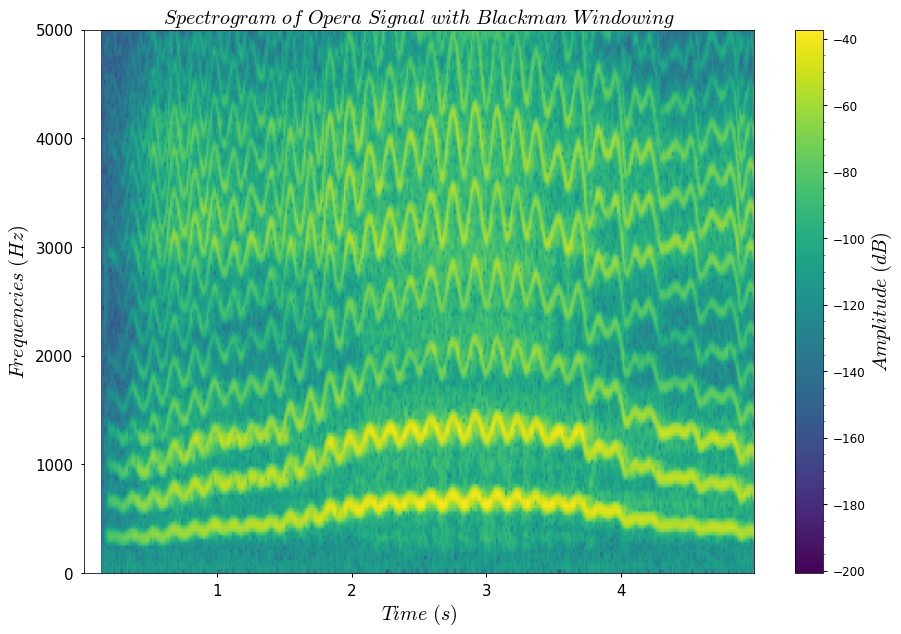

In [34]:
Fs2, opera= wavfile.read('Opera.wav')
opera = opera/32767.0
print('Sampling rate of instrument : {}Hz'.format(Fs2))
print('Size of instrument signal: {}'.format(opera.shape))

Noso = 1400

def specgram2d(y, N, Fs, window=None, ax=None, title=None):
  ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True, fontsize = 20)
  if window=='hamming':
    ws=sp.windows.hamming(N)
  elif window=='hanning':
    ws=sp.windows.hanning(N)
  elif window=='blackman':
    ws=sp.windows.blackman(N)
  else:
    ws=sp.windows.boxcar(N)
  spec, freqs, t, im = ax.specgram(y, NFFT=N, Fs=Fs, window=ws, noverlap=800, scale='dB')
  ax.set_xlabel(r'$Time\ (s)$', fontsize = 20)
  ax.set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 20)
  ax.set_ylim((0, 5000))
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 20)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  fig4.tight_layout()


fig5, ax1 = plt.subplots(figsize=(15,10))
specgram2d(opera, Noso, Fs2, ax=ax1, window='blackman', title = r'$Spectrogram\ of\ Opera\ Signal\ with\ Blackman\ Windowing$')
fig5.savefig('fig8.png')


display(Audio(data=opera, rate=Fs2))

# **Problem** **3**. <br>

In [21]:
pip install pydub

In [25]:
import pydub
from pydub import AudioSegment
import base64
from google.colab import output
from IPython.display import Audio , display, Javascript
RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: {sampleRate: 4000} })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3, filename='recording.wav'):
  try:
    from google.colab import output
  except ImportError:
    print('No possible to import output from google.colab')
    return ''
  else:
    print('Recording')
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    print('Saving to', filename)
    b = base64.b64decode(s.split(',')[1])
    with open(filename, 'wb') as f:
      f.write(b)
    return filename

In [38]:
record(filename = 'filen')
fs = 4000

audio = AudioSegment.from_file('filen')
audio = audio.set_frame_rate(fs).set_channels(1)
audio.export('name_recording.wav', format="wav")

fs, recording_track = wavfile.read('name_recording.wav')
display(Audio(data=recording_track, rate=fs))


Recording


<IPython.core.display.Javascript object>

Saving to filen


Sampling rate of instrument : 4000Hz
Size of instrument signal: (11760,)


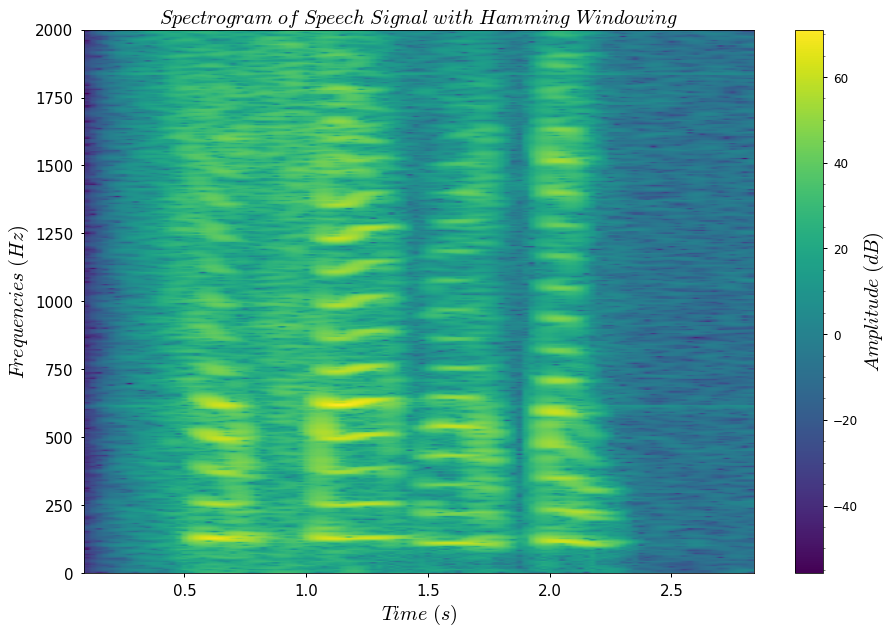

In [39]:
Fs3, rec = wavfile.read('name_recording.wav')
rec = rec/32767.0
print('Sampling rate of instrument : {}Hz'.format(Fs3))
print('Size of instrument signal: {}'.format(rec.shape))

Nosr = 800
def specgram2d(y, N, Fs, window=None, ax=None, title=None):
  ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True, fontsize = 20)
  if window=='hamming':
    ws=sp.windows.hamming(N)
  elif window=='hanning':
    ws=sp.windows.hanning(N)
  elif window=='blackman':
    ws=sp.windows.blackman(N)
  else:
    ws=sp.windows.boxcar(N)
  spec, freqs, t, im = ax.specgram(y, NFFT=N, Fs=Fs, window=ws, noverlap=700, scale='dB')
  ax.set_xlabel(r'$Time\ (s)$', fontsize = 20)
  ax.set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 20)
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 20)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  fig4.tight_layout()


fig6, ax1 = plt.subplots(figsize=(15,10))
specgram2d(rec, Nosr, Fs3, ax=ax1, window='hamming', title = r'$Spectrogram\ of\ Speech\ Signal\ with\ Hamming\ Windowing$')
fig6.savefig('fig9.png')

display(Audio(data=rec, rate=Fs3))